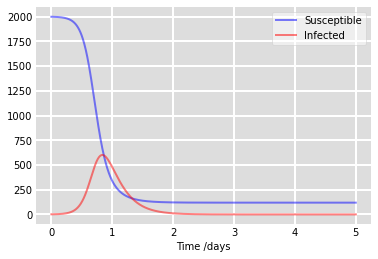

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 2000
# Initial number of infected individuals, I0
I0 = 1
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0
# Contact rate, beta, and mean recovery rate, mu.
beta, mu = 0.0075, 5
# A grid of time points (in days)
t = np.linspace(0, 5, 1000) 

# The SIR model differential equations.
def deriv(y, t, N, beta, mu):
    S, I = y
    dSdt = -beta * S * I 
    dIdt = beta * S * I - mu * I
    return dSdt, dIdt

# Initial conditions vector
y0 = S0, I0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, mu))
S, I = ret.T

# Plot the data on two separate curves for S(t), I(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.set_xlabel('Time /days')
#ax.set_ylabel('Number (1000s)')
#ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [2]:
print(S.shape)
print(I.shape)
print(t.shape)

(1000,)
(1000,)
(1000,)


In [3]:
#save to csv file
a = np.asarray([t, S, I ]) 

#np.savetxt("SIR_data.csv", a, delimiter=",")

In [4]:
#load csv file
from numpy import genfromtxt
csv_file = genfromtxt('SIR_data.csv', delimiter=',')
csv_file.shape

(3, 1000)